In [2]:
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt
import tensorflow
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense,Activation,BatchNormalization
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import img_to_array,ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.models import Model

In [3]:
from zipfile import ZipFile
with ZipFile("/content/drive/MyDrive/dog-cat-panda.zip",'r') as zip:
  zip.extractall()
  print('Done')
  

Done


In [4]:
file_cat=os.listdir("/content/animals/cats")
print('cat Data')
print(file_cat)
file_dog=os.listdir("/content/animals/dogs")
print('Dog Data')
print(file_dog)

file_panda=os.listdir("/content/animals/panda")
print('Panda Data')
print(file_panda)



cat Data
['cats_00457.jpg', 'cats_00050.jpg', 'cats_00332.jpg', 'cats_00459.jpg', 'cats_00683.jpg', 'cats_00800.jpg', 'cats_00930.jpg', 'cats_00792.jpg', 'cats_00840.jpg', 'cats_00490.jpg', 'cats_00377.jpg', 'cats_00904.jpg', 'cats_00084.jpg', 'cats_00723.jpg', 'cats_00309.jpg', 'cats_00471.jpg', 'cats_00232.jpg', 'cats_00481.jpg', 'cats_00342.jpg', 'cats_00175.jpg', 'cats_00230.jpg', 'cats_00265.jpg', 'cats_00287.jpg', 'cats_00537.jpg', 'cats_00631.jpg', 'cats_00338.jpg', 'cats_00787.jpg', 'cats_00305.jpg', 'cats_00391.jpg', 'cats_00434.jpg', 'cats_00991.jpg', 'cats_00952.jpg', 'cats_00077.jpg', 'cats_00115.jpg', 'cats_00603.jpg', 'cats_00658.jpg', 'cats_00117.jpg', 'cats_00455.jpg', 'cats_00142.jpg', 'cats_00726.jpg', 'cats_00194.jpg', 'cats_00601.jpg', 'cats_00291.jpg', 'cats_00940.jpg', 'cats_00995.jpg', 'cats_00347.jpg', 'cats_00858.jpg', 'cats_00592.jpg', 'cats_00751.jpg', 'cats_00575.jpg', 'cats_00207.jpg', 'cats_00307.jpg', 'cats_00351.jpg', 'cats_00040.jpg', 'cats_00541.jpg', 

In [5]:
for image in file_cat:
    img=os.path.join("/content/animals/cats",image)
    print(img)
    break

/content/animals/cats/cats_00457.jpg


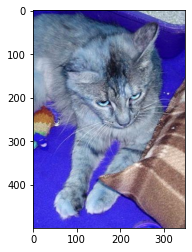

In [6]:
for image in file_cat:
    img=os.path.join("/content/animals/cats",image)
    img_a=cv2.imread(img)
    plt.imshow(img_a)
    break   

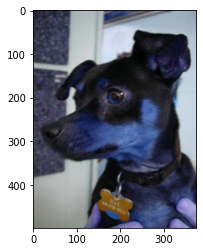

In [7]:
for image in file_dog:
    img=os.path.join("/content/animals/dogs",image)
    img_a=cv2.imread(img)
    plt.imshow(img_a)
    break

In [8]:
value_train=[]
for image in file_cat:
    img=os.path.join("/content/animals/cats",image)
    
    pic=load_img(img,target_size=(100,100))
    pic=img_to_array(pic)
    pics=preprocess_input(pic)
    value_train.append([pics,0])

for image in file_dog:
    img=os.path.join("/content/animals/dogs",image)
    
    pic=load_img(img,target_size=(100,100))
    pic=img_to_array(pic)
    pics=preprocess_input(pic)
    value_train.append([pics,1])

for image in file_panda:
    img=os.path.join("/content/animals/panda",image)
    
    pic=load_img(img,target_size=(100,100))
    pic=img_to_array(pic)
    pics=preprocess_input(pic)
    value_train.append([pics,2])
      

In [9]:
random.shuffle(value_train)


In [10]:
X=[]
Y=[]
for i in range(len(value_train)):
  X.append(value_train[i][0])
  Y.append(value_train[i][1])

In [11]:
X=np.array(X,dtype="float32")
Y=np.array(Y)


In [12]:
model = Sequential()

model.add(Conv2D(64,(3,3),activation ='relu', input_shape = (100,100,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D( 32,(3,3), activation ='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(16,(3,3), activation ='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(8,(3,3), activation ='relu'))
model.add(MaxPooling2D((2,2)))



model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dense(64, activation = "relu"))
model.add(Dense(3, activation = "softmax"))

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam',metrics=['accuracy'])

model.summary()





Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 16)       0

In [15]:
X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, Y, test_size = 0.2)

X_train, X_val, Y_train, Y_val = train_test_split(X_train_val, Y_train_val, test_size = 0.3)

model.fit(X_train, Y_train,epochs =10, validation_data = (X_val, Y_val))

Epoch 1/10
53/53 [==============================] - 34s 646ms/step - loss: 0.5218 - accuracy: 0.7708 - val_loss: 0.4971 - val_accuracy: 0.7903
Epoch 2/10
53/53 [==============================] - 32s 608ms/step - loss: 0.4194 - accuracy: 0.8155 - val_loss: 0.4808 - val_accuracy: 0.7917
Epoch 3/10
53/53 [==============================] - 32s 608ms/step - loss: 0.3512 - accuracy: 0.8554 - val_loss: 0.5351 - val_accuracy: 0.7806
Epoch 4/10
53/53 [==============================] - 32s 608ms/step - loss: 0.3500 - accuracy: 0.8565 - val_loss: 0.5271 - val_accuracy: 0.7986
Epoch 5/10
53/53 [==============================] - 32s 607ms/step - loss: 0.2677 - accuracy: 0.8827 - val_loss: 0.6560 - val_accuracy: 0.7583
Epoch 6/10
53/53 [==============================] - 34s 638ms/step - loss: 0.2423 - accuracy: 0.9030 - val_loss: 0.5375 - val_accuracy: 0.8056
Epoch 7/10
53/53 [==============================] - 33s 611ms/step - loss: 0.1612 - accuracy: 0.9435 - val_loss: 0.8065 - val_accuracy: 0.7486

In [16]:
Y_pred = model.predict(X_test)
score = model.evaluate(X_test, Y_test)
print('Accuracy over the test set: \n ', round((score[1]*100), 2), '%')


19/19 [==============================] - 2s 131ms/step - loss: 0.8456 - accuracy: 0.7467
Accuracy over the test set: 
  74.67 %


According to model the image is of panda


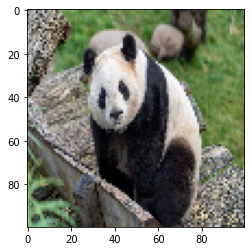

In [17]:
from keras.preprocessing import image
import cv2
pic=load_img("/content/drive/MyDrive/image.jfif",target_size=(100,100))

plt.imshow(pic)
pic=img_to_array(pic)
pics=preprocess_input(pic)
pics = np.expand_dims(pics,axis=0)
category = model.predict(pics)
if category[0][0]==0:
    prediction = 'cat'
elif category[0][0]==1:
    prediction = 'dog'
else:
  prediction='panda'   
print("According to model the image is of",prediction)